In [129]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df_2022 = pd.read_csv(r"C:\Users\myasu\Downloads\2022.csv")
df_2022

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


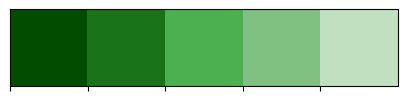

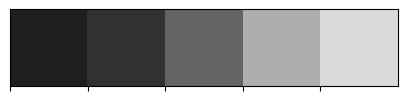

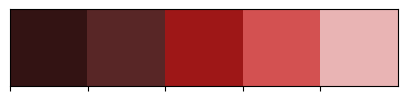

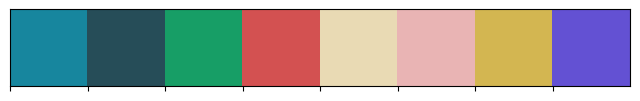

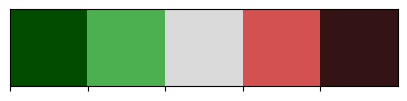

In [131]:
# Membuat Color pallete untuk mempercantik tampilan
colors_green = ["#004D00", "#197419", '#4CAF50', '#80C080', '#C0E0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#004D00", '#4CAF50', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [132]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022.loc[:, col] = df_2022[col].str.replace(',', '.').astype(float)
    # Simpan DataFrame yang telah dimodifikasi ke lokal



In [133]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara AFC 2024
afc_countries = ["Qatar", "Indonesia", "Australia", "Jordan", "South Korea",
                 "Japan", "China", "United Arab Emirates", "Iraq", "Saudi Arabia",
                 "Tajikistan", "Thailand", "Uzbekistan", "Vietnam", "Kuwait*", "Malaysia"]

afc_df = df_2022.loc[df_2022['Country'].isin(afc_countries)]

In [134]:
afc_df.loc[afc_df['Country']=='United Arab Emirates', 'Country'] = 'UAE'
afc_df.loc[afc_df['Country']=='Kuwait', 'Country'] = 'Kuwait*'

C:\Users\myasu\AppData\Local\Temp\ipykernel_16604\47101867.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(afc_df['Country'], rotation=45, ha="right")


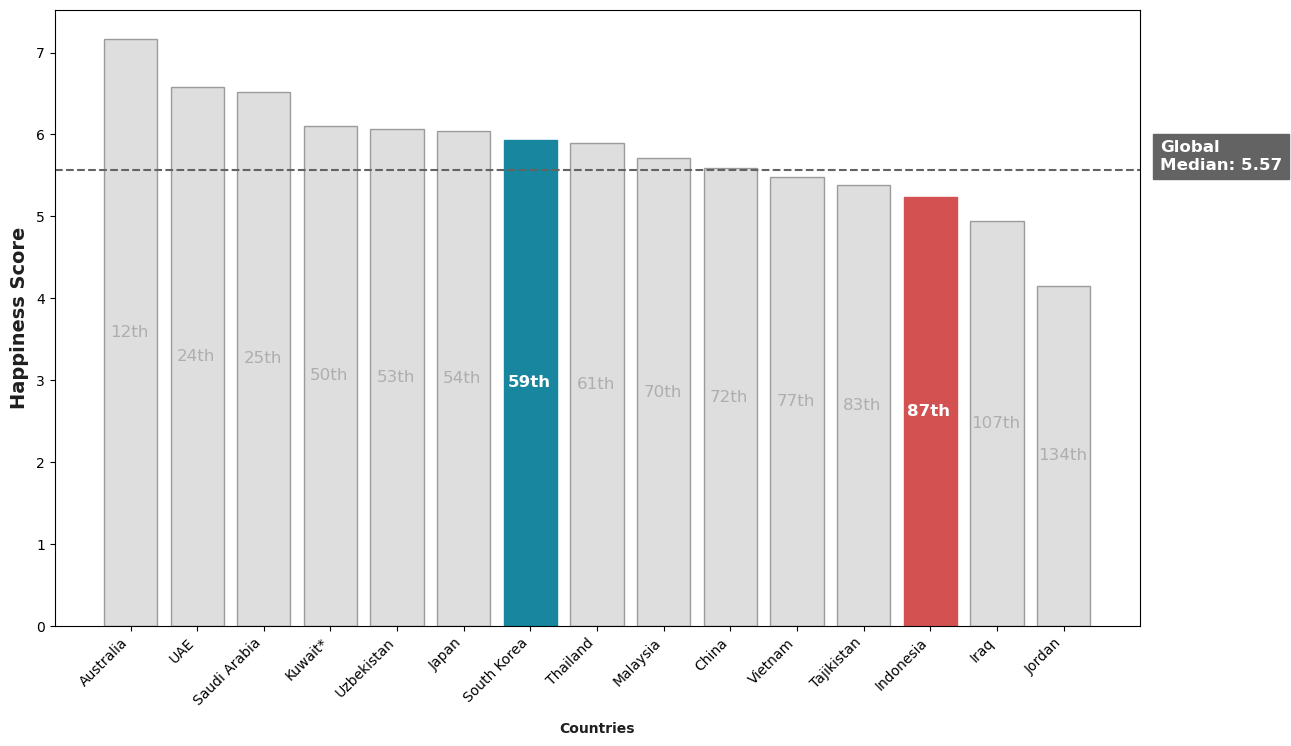

In [135]:
# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Happiness score'].median()

afc_idx = list(afc_df.index + 1)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(afc_df['Country'], afc_df['Happiness score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])

# Meningkatkan opaqueness bar Korea menjadi 1 (tak transparan)
bars1[6].set_alpha(1)
# Mengatur warna bar Korea dengan warna spesifik dari colors_mix
bars1[6].set_color(colors_mix[0])
# Mengatur warna tepi bar Korea
bars1[6].set_edgecolor(colors_mix[0])

# Meningkatkan opaqueness bar Korea menjadi 1 (tak transparan)
bars1[12].set_alpha(1)
# Mengatur warna bar Korea dengan warna spesifik dari colors_mix
bars1[12].set_color(colors_mix[3])
# Mengatur warna tepi bar Korea
bars1[12].set_edgecolor(colors_mix[3])

# Rotate x-axis labels
ax.set_xticklabels(afc_df['Country'], rotation=45, ha="right")

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_dark[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Melakukan iterasi pada setiap baris dalam 'bars1' (ASEAN countries bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Jika indeks tidak sama dengan 6 atau 12 (kondisi khusus untuk bar tertentu, mungkin Indonesia)
    if i not in [6,12]:
        # Menambahkan teks pada posisi tertentu di atas bar
        ax.text(
            s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color=colors_dark[3],  # Warna teks
            fontsize=12,  # Ukuran font teks
        )
    else:
        # Untuk bar dengan indeks 6 atau 12, menggunakan format teks yang berbeda
        ax.text(
            s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color='white',  # Warna teks
            fontsize=12,  # Ukuran font teks
            fontweight='bold'  # Membuat font tebal
        )

# Menampilkan plot
plt.show()

In [136]:
afc_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
11,12,Australia,7.162,7.244,7.081,2.011,1.9,1.203,0.772,0.676,0.258,0.341
23,24,UAE,6.576,6.66,6.492,1.809,1.998,0.98,0.633,0.702,0.204,0.25
24,25,Saudi Arabia,6.523,6.637,6.409,2.075,1.87,1.092,0.577,0.651,0.078,0.18
49,50,Kuwait*,6.106,6.235,5.977,1.621,1.904,0.983,0.747,0.617,0.087,0.147
52,53,Uzbekistan,6.063,6.178,5.948,1.913,1.219,1.092,0.6,0.716,0.283,0.24
53,54,Japan,6.039,6.119,5.959,1.487,1.835,1.089,0.866,0.537,0.007,0.218
58,59,South Korea,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176
60,61,Thailand,5.891,5.994,5.788,1.6,1.535,1.096,0.697,0.617,0.321,0.026
69,70,Malaysia,5.711,5.845,5.578,1.471,1.689,0.938,0.62,0.654,0.213,0.126
71,72,China,5.585,5.65,5.52,1.516,1.508,0.958,0.705,0.656,0.099,0.142


In [137]:
afc_df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [138]:
angles

[0.0,
 0.8975979010256552,
 1.7951958020513104,
 2.6927937030769655,
 3.5903916041026207,
 4.487989505128276,
 5.385587406153931,
 0.0]

In [147]:
#Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Indonesia']
df_plot = afc_df[afc_df['Country'].isin(countries)]


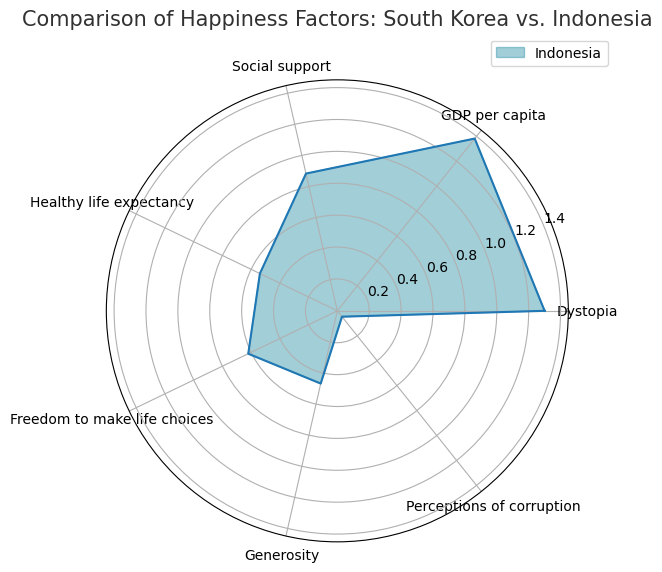

In [148]:
# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Indonesia']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Columns to include in the radar chart
columns = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
           'Explained by: Social support', 'Explained by: Healthy life expectancy',
           'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Number of variables we're plotting.
num_vars = len(columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop by appending the first angle at the end.

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for k, (idx, row) in enumerate(df_plot.iterrows()):
    data = row[columns].tolist() + row[columns].tolist()[:1]  # Complete the loop
    ax.fill(angles, data, alpha=0.4, label=row['Country'], color=colors_mix[3*k], edgecolor=colors_mix[3*k])
    ax.plot(angles, data)

# Labels for each point
ax.set_xticks(angles[:-1])
col_name = ['Dystopia', 'GDP per capita',
           'Social support', 'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
ax.set_xticklabels(col_name)

# Title and legend
plt.title('Comparison of Happiness Factors: South Korea vs. Indonesia', size=15, color=colors_dark[1], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [149]:
row

RANK                                                 87
Country                                       Indonesia
Happiness score                                    5.24
Whisker-high                                      5.341
Whisker-low                                       5.139
Dystopia (1.83) + residual                          1.3
Explained by: GDP per capita                      1.382
Explained by: Social support                      0.883
Explained by: Healthy life expectancy             0.539
Explained by: Freedom to make life choices         0.62
Explained by: Generosity                          0.468
Explained by: Perceptions of corruption           0.047
Name: 86, dtype: object

C:\Users\myasu\AppData\Local\Temp\ipykernel_16604\3444210165.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot['Country'], rotation=45, ha="right")


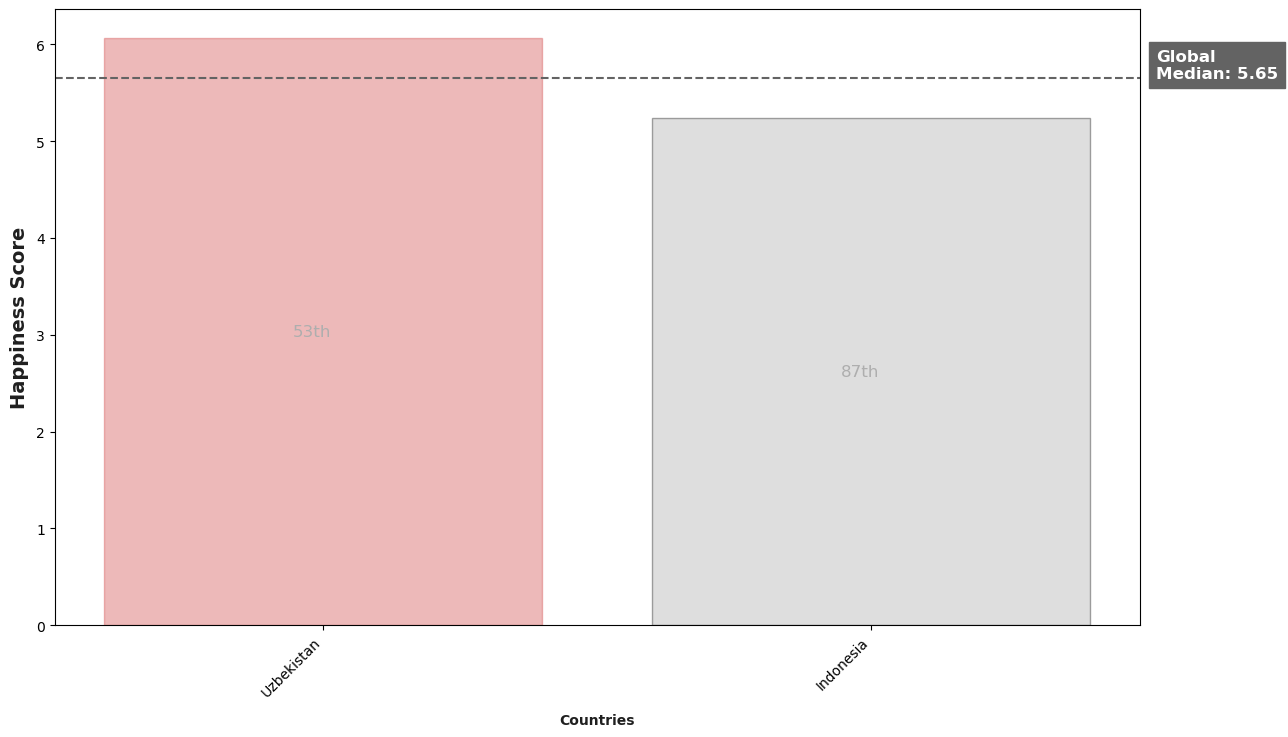

In [150]:
# Filter rows for Indonesia and Uzbekistan
countries = ['Indonesia', 'Uzbekistan']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Menghitung skor kebahagiaan median dari df_plot
median_score = df_plot['Happiness score'].median()

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara AFC
bars1 = ax.bar(df_plot['Country'], df_plot['Happiness score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])

# Mengatur warna bar untuk Indonesia
bars1[0].set_color(colors_mix[0])

# Mengatur warna bar untuk Uzbekistan
for i, country in enumerate(df_plot['Country']):
    if country == 'Uzbekistan':
        bars1[i].set_color(colors_mix[3])
        break

# Rotate x-axis labels
ax.set_xticklabels(df_plot['Country'], rotation=45, ha="right")

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_dark[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Melakukan iterasi pada setiap baris dalam 'bars1' (negara-negara AFC bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Menambahkan teks pada posisi tertentu di atas bar
    ax.text(
        s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
        va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
        x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
        color=colors_dark[3],  # Warna teks
        fontsize=12,  # Ukuran font teks
    )

# Menampilkan plot
plt.show()


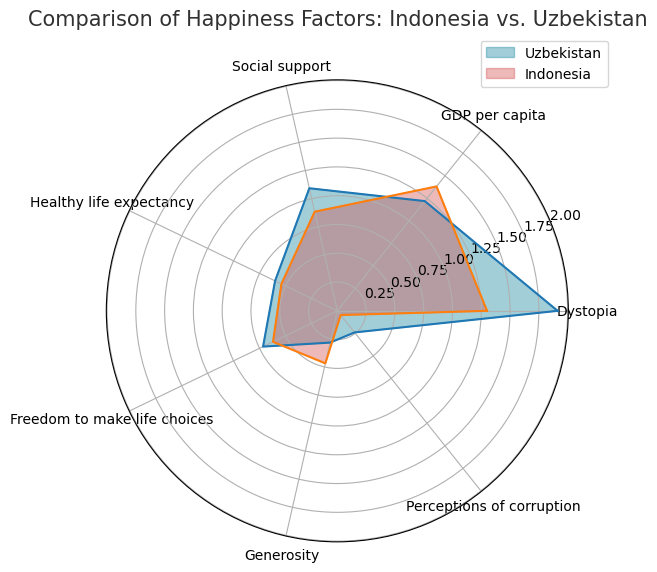

In [151]:
# Filter rows for Indonesia and Uzbekistan
countries = ['Indonesia', 'Uzbekistan']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for k, (idx, row) in enumerate(df_plot.iterrows()):
    data = row[columns].tolist() + row[columns].tolist()[:1]  # Complete the loop
    ax.fill(angles, data, alpha=0.4, label=row['Country'], color=colors_mix[3*k], edgecolor=colors_mix[3*k])
    ax.plot(angles, data)

# Labels for each point
ax.set_xticks(angles[:-1])
col_name = ['Dystopia', 'GDP per capita',
           'Social support', 'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
ax.set_xticklabels(col_name)

# Title and legend
plt.title('Comparison of Happiness Factors: Indonesia vs. Uzbekistan', size=15, color=colors_dark[1], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


C:\Users\myasu\AppData\Local\Temp\ipykernel_16604\3415745566.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(afc_df['Country'], rotation=45, ha="right")


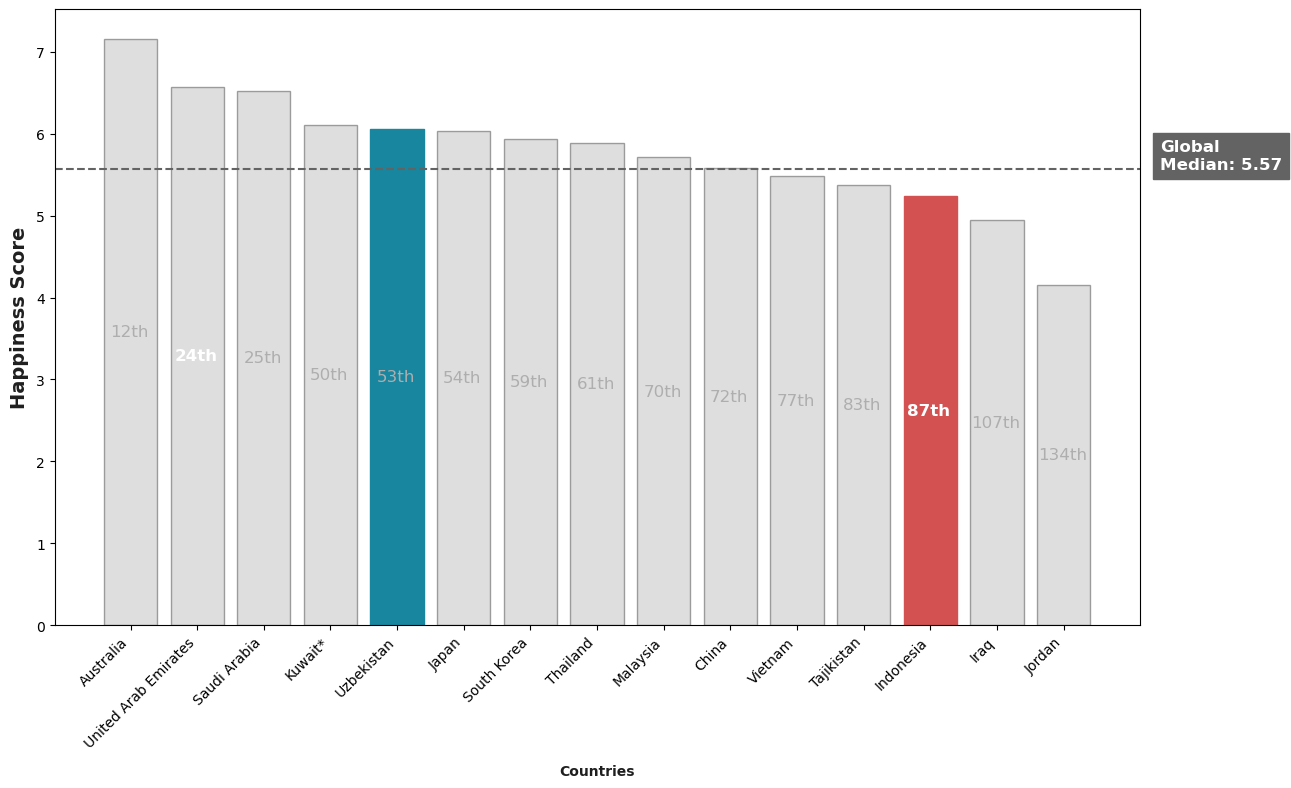

In [152]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara AFC 2024
afc_countries = ["Qatar", "Indonesia", "Australia", "Jordan", "South Korea",
                 "Japan", "China", "United Arab Emirates", "Iraq", "Saudi Arabia",
                 "Tajikistan", "Thailand", "Uzbekistan", "Vietnam", "Kuwait*", "Malaysia"]

afc_df = df_2022.loc[df_2022['Country'].isin(afc_countries)]

# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Happiness score'].median()

afc_idx = list(afc_df.index + 1)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(afc_df['Country'], afc_df['Happiness score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])

# Meningkatkan opaqueness bar Indonesia menjadi 1 (tak transparan)
bars1[4].set_alpha(1)
# Mengatur warna bar Indonesia dengan warna spesifik dari colors_mix
bars1[4].set_color(colors_mix[0])
# Mengatur warna tepi bar Indonesia
bars1[4].set_edgecolor(colors_mix[0])

# Meningkatkan opaqueness bar Uzbekistan menjadi 1 (tak transparan)
bars1[12].set_alpha(1)
# Mengatur warna bar Uzbekistan dengan warna spesifik dari colors_mix
bars1[12].set_color(colors_mix[3])
# Mengatur warna tepi bar Uzbekistan
bars1[12].set_edgecolor(colors_mix[3])

# Rotate x-axis labels
ax.set_xticklabels(afc_df['Country'], rotation=45, ha="right")

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_dark[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Melakukan iterasi pada setiap baris dalam 'bars1' (ASEAN countries bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Jika indeks tidak sama dengan 1 atau 12 (kondisi khusus untuk bar tertentu, mungkin Indonesia atau Uzbekistan)
    if i not in [1, 12]:
        # Menambahkan teks pada posisi tertentu di atas bar
        ax.text(
            s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color=colors_dark[3],  # Warna teks
            fontsize=12,  # Ukuran font teks
        )
    else:
        # Untuk bar dengan indeks 1 atau 12, menggunakan format teks yang berbeda
        ax.text(
            s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color='white',  # Warna teks
            fontsize=12,  # Ukuran font teks
            fontweight='bold'  # Membuat font tebal
        )

# Menampilkan plot
plt.show()


C:\Users\myasu\AppData\Local\Temp\ipykernel_16604\1558997071.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(afc_df['Country'], rotation=0, ha="center")


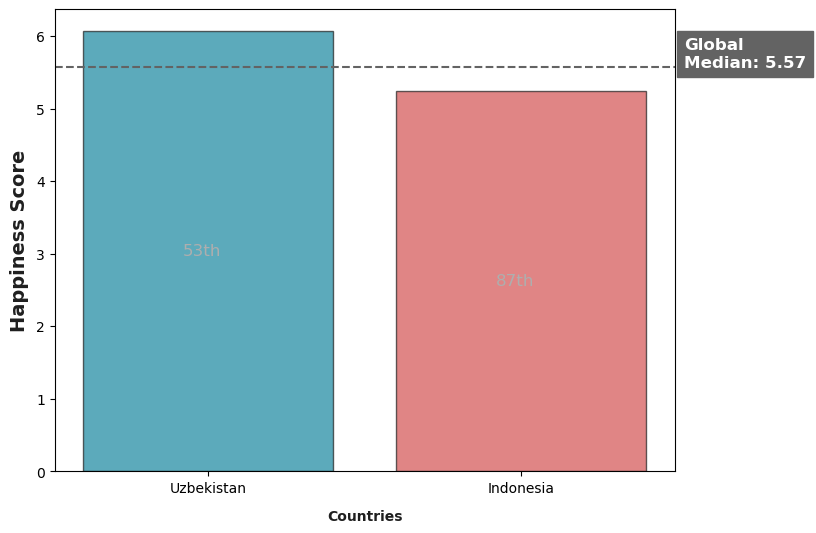

In [153]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara AFC 2024
afc_countries = ["Indonesia", "Uzbekistan"]

afc_df = df_2022.loc[df_2022['Country'].isin(afc_countries)]

# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Happiness score'].median()

afc_idx = list(afc_df.index + 1)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(8, 6))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(afc_df['Country'], afc_df['Happiness score'], color=[colors_mix[0], colors_mix[3]], alpha=0.7, edgecolor=colors_dark[0])

# Rotate x-axis labels
ax.set_xticklabels(afc_df['Country'], rotation=0, ha="center")

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_dark[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Melakukan iterasi pada setiap baris dalam 'bars1' (negara bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Menambahkan teks pada posisi tertentu di atas bar
    ax.text(
        s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
        va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
        x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
        color=colors_dark[3],  # Warna teks
        fontsize=12,  # Ukuran font teks
    )

# Menampilkan plot
plt.show()
